| model         | analysis (cpu) | ent. code | ent. decode | synthesis (cpu) | enc (cpu) | dec (cpu) | analysis (gpu) | synthesis (gpu) | gpu enc | gpu dec | Enc P    | Dec P    |
|:-------------:|:--------------:|:---------:|:-----------:|:---------------:|:---------:|:---------:|:--------------:|:---------------:|:-------:|:-------:|:--------:|:--------:|
| f16c48        | 10.540         | 35.941    | 762.06      | 0.73783         | 8.1498    | 0.73712   | 166.79         | 205.63          | 34.647  | 161.59  | 493.00 K | 76.075 M |
| f16c48 v2     | 10.435         | 318.18    | 421.98      | 0.75283         | 10.050    | 0.75140   | 169.34         | 200.78          | 110.52  | 136.05  | 493.00 K | 76.075 M |
| Cosmos DI16   |                |           |             |                 |           |           | 14.877         | 11.288          | 14.833  | 11.267  | 34.621 M | 49.103 M |
| WaLLoC f8c48  | 21.773         | 11.061    | 1876.9      | 0.30510         | 7.3349    | 0.30510   | 302.35         | 226.31          | 10.371  | 191.42  | 9264.0   | 57.132 M |
| WaLLoC f16c48 | 20.617         |           |             |  1.6716         |           |           | 284.18         | 390.37          |         |         |          |          |

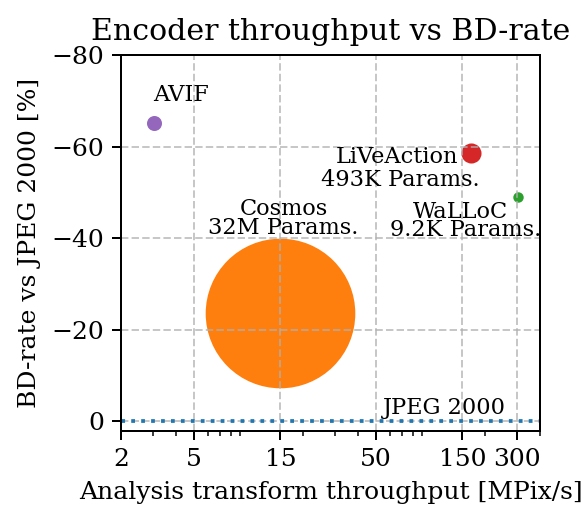

In [40]:
import matplotlib.pyplot as plt, numpy as np

encoders = ["", "Cosmos", "WaLLoC", "LiVeAction", "AVIF"]
throughput = [50, 14.877, 302.35, 166.79, 3.0123]
bd_ssim_rate  = np.array([0, -29.9439, -57.5230, -70.0758, -71.0959])
bd_psnr_rate  = np.array([0, +49.6106, -27.6079, -36.3974, -64.0286])
bd_dists_rate = np.array([0, -90.8796, -61.7135, -69.0857, -60.5623])
bd_rate = (1/3)*(bd_ssim_rate + bd_psnr_rate + bd_dists_rate)
# bd_rate = (1/2)*(bd_ssim_rate + bd_dists_rate)

sizes = np.array([0, 34.621, 0.009264, 0.493, 0.25])
sizes[2] = 0.1 # too small to see
sizes = 100*sizes
plt.rcParams["font.family"] = "serif"
plt.figure(figsize=(3.2, 3), dpi=180)

for i in range(5):
    plt.scatter(throughput[i], bd_rate[i], s=sizes[i])

plt.xscale('log')

for i, label in enumerate(encoders):
    if i ==1:
        plt.text(9, -45, label, fontsize=9)
        plt.text(6, -41, '32M Params.', fontsize=9)
    elif i ==2:
        plt.text(80, -44.5, label, fontsize=9)
        plt.text(60, -40.5, '9.2K Params.', fontsize=9)
    elif i ==3:
        plt.text(30, -56.5, label, fontsize=9)
        plt.text(25, -51.5, '493K Params.', fontsize=9)
    elif i ==4:
        plt.text(3, -70, label, fontsize=9)
        # plt.text(25, -51.5, 'AVIF', fontsize=9)

plt.plot([0.5,400],[0,0],linestyle=':')
plt.text(55,-1.5, 'JPEG 2000', fontsize=9)
    
plt.xlabel("Analysis transform throughput [MPix/s]")
plt.ylabel("BD-rate vs JPEG 2000 [%]")
plt.title("Encoder throughput vs BD-rate")
plt.xlim([2,400])
plt.ylim([-80,2])
plt.xticks([2,5,15,50,150,300],labels = ['2','5','15','50','150','300']);
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.savefig('tp_vs_bd.svg')
